Title: Regression Models

Ridge & Lasso Regression (Regularization Techniques)


Task 1: Use Ridge regression on a dataset with multicollinearity to compare results with linear regression.

In [1]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 2: Create a synthetic dataset with multicollinearity
np.random.seed(42)
X1 = np.random.rand(100)
X2 = X1 + np.random.normal(0, 0.01, 100)  # Highly correlated with X1
X3 = np.random.rand(100)
y = 3*X1 + 2*X2 + 5*X3 + np.random.normal(0, 0.1, 100)

# Create DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})

# Step 3: Train-Test Split
X = df[['X1', 'X2', 'X3']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)

# Step 5: Train Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Step 6: Compare Results
print("Linear Regression Coefficients:", lin_reg.coef_)
print("Ridge Regression Coefficients:", ridge_reg.coef_)
print("Linear Regression MSE:", mse_lin)
print("Ridge Regression MSE:", mse_ridge)


Linear Regression Coefficients: [4.60714716 0.37693213 5.02847578]
Ridge Regression Coefficients: [2.34758564 2.33297239 4.36420609]
Linear Regression MSE: 0.006742878758661827
Ridge Regression MSE: 0.045100919357462514


Task 2: Implement Lasso regression and observe effect on feature selection in feature rich data.

In [2]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 2: Generate synthetic data with many features
X, y = make_regression(n_samples=100, n_features=20, n_informative=5, noise=0.1, random_state=42)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit Lasso Regression
lasso = Lasso(alpha=0.1)  # Adjust alpha to control regularization strength
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

# Step 5: Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print("Lasso Regression MSE:", mse)

# Step 6: Print coefficients
print("Lasso Coefficients:")
print(lasso.coef_)

# Step 7: Feature Selection Analysis
selected_features = np.sum(lasso.coef_ != 0)
print(f"Number of selected features: {selected_features} out of {X.shape[1]}")


Lasso Regression MSE: 0.0765220979663428
Lasso Coefficients:
[ 6.48020494  0.         40.53863172  0.         -0.         -0.
 10.95043678  0.         80.68281907 34.83798759 -0.          0.
  0.         -0.          0.         -0.         -0.         -0.
  0.          0.        ]
Number of selected features: 5 out of 20



Task 3: Regularization effects visualization with model complexity and performance metrics comparison.

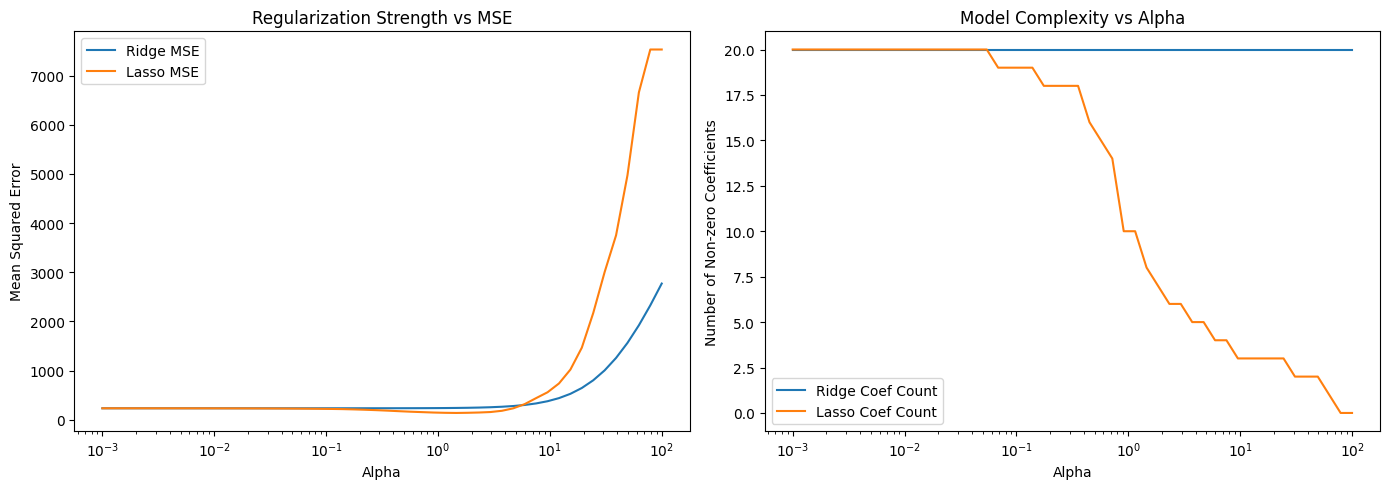

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=20, n_informative=5, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = np.logspace(-3, 2, 50)  # Alpha values from 0.001 to 100
ridge_mse = []
lasso_mse = []
ridge_coefs = []
lasso_coefs = []

# Evaluate Ridge and Lasso for different alpha values
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    ridge_mse.append(mean_squared_error(y_test, ridge_pred))
    ridge_coefs.append(np.count_nonzero(ridge.coef_))

    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    lasso_mse.append(mean_squared_error(y_test, lasso_pred))
    lasso_coefs.append(np.count_nonzero(lasso.coef_))

# Plotting
plt.figure(figsize=(14, 5))

# Plot MSE vs Alpha
plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_mse, label="Ridge MSE")
plt.plot(alphas, lasso_mse, label="Lasso MSE")
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error")
plt.title("Regularization Strength vs MSE")
plt.legend()

# Plot Number of Coefficients ≠ 0
plt.subplot(1, 2, 2)
plt.plot(alphas, ridge_coefs, label="Ridge Coef Count")
plt.plot(alphas, lasso_coefs, label="Lasso Coef Count")
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Number of Non-zero Coefficients")
plt.title("Model Complexity vs Alpha")
plt.legend()

plt.tight_layout()
plt.show()
